In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib as mpl
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
#[f.name for f in mpl.font_manager.fontManager.ttflist]

In [7]:
CancerData = pd.read_csv('https://quality.data.gov.tw/dq_download_csv.php?nid=6399&md5_url=47a8a12deaa293e4e6f027f1f8e03a45')

In [8]:
CancerData.head()

,癌症診斷年,性別,縣市別,癌症別,年齡標準化發生率 WHO 2000世界標準人口 (每10萬人口),癌症發生數,平均年齡,年齡中位數,粗率 (每10萬人口)
0,1979,不分男女,台閩地區,口腔、口咽及下咽,3.40,439,53.37,55.0,2.50
1,1979,不分男女,台北市,口腔、口咽及下咽,3.85,65,52.00,55.0,2.96
2,1979,不分男女,台中市,口腔、口咽及下咽,4.16,45,54.18,55.0,2.88
3,1979,不分男女,台南市,口腔、口咽及下咽,1.58,19,55.79,57.0,1.24
4,1979,不分男女,高雄市,口腔、口咽及下咽,2.10,32,48.56,50.0,1.49


In [9]:
section = CancerData['癌症發生數'].groupby(CancerData['縣市別'])


In [17]:
def CalculateCountyCancer(CountyName): 
    section = CancerData[CancerData['縣市別'] == CountyName]
    group = section['癌症發生數'].groupby(section['癌症別'])

    plt.figure(figsize=(20,10))
    plt.bar(np.arange(len(group.count())),group.sum())
    plt.xticks(np.arange(len(group.count())), list(group.indices), rotation=90, fontsize=20)
    plt.ylabel('發生數', fontsize=30)
    plt.title(CountyName + '各類別癌症發生數', fontsize=40)

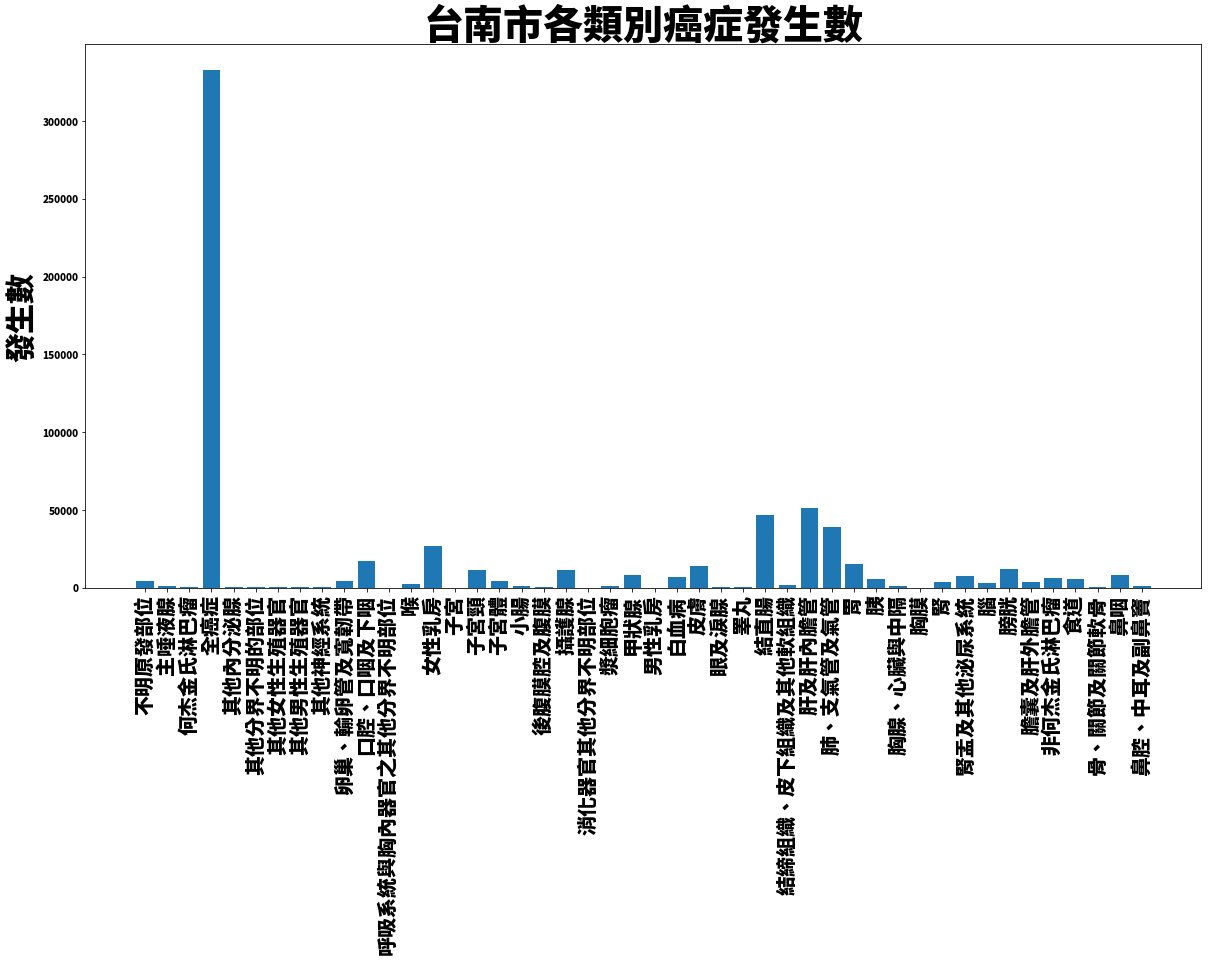

In [18]:
CalculateCountyCancer('台南市')

In [19]:
from ipywidgets import interact
#interact(CalculateCountyCancer, CountyName = dict(台南市="台南市", 高雄市="高雄市", 台北市="台北市"))
interact(CalculateCountyCancer, CountyName = list(group.indices))

interactive(children=(Dropdown(description='CountyName', options={'台南市': '台南市', '高雄市': '高雄市', '台北市': '台北市'}, v…

<function __main__.CalculateCountyCancer(CountyName)>

In [21]:
list(CancerData['縣市別'].indices)

AttributeError: 'Series' object has no attribute 'indices'

In [37]:
pd.value_counts(CancerData['縣市別']).to_frame()

['縣市別']